# Create a Random Forest Model 
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [1]:
# Import relevant libraries and set display options 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

pd.set_option("display.max_rows", 10)

In [2]:
# Create dataframe including all covariables to explore for initial model 
df = pd.read_csv('CompleteBaselineAcuteDataVoxtox.csv')
recurrence_df = pd.read_csv('RecurrencePatientIDs.csv')
df = pd.merge(df, recurrence_df, how='outer', on=['PATIENT_ID'])

In [3]:
df['LOCAL_RECURRENCE'].fillna(0, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df

,PATIENT_ID,ASSESSMENT_DATE,HEIGHT,WEIGHT,SMOKER,SMOKING_AGE_STARTED,ALCOHOL,PRIMARY_SURGERY,NEOADJUVANT_CHEMO,AGE,...,DYSPHAGIA_BASELINE,ORAL_MUCOSITIS_BASELINE,LOCAL_RECURRENCE,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,VT1_H_A0254K1L,06/01/2014,178.9,82.8,1.0,10,0.0,0.0,1.0,65.0,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VT1_H_B2F981K1,18/12/2013,176.8,100.5,1.0,14,1.0,1.0,1.0,59.0,...,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VT1_H_9FF402K1,19/12/2013,NaN,NaN,2.0,NaN,2.0,1.0,0.0,63.0,...,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VT1_H_1E5602K1,16/12/2013,153.0,101.6,1.0,25,0.0,1.0,1.0,44.0,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VT1_H_4091F1K1,18/12/2013,151.0,50.8,1.0,14,0.0,0.0,1.0,64.0,...,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,VT1_H_DB29D1K1,13/11/2013,171.0,88.0,1.0,16.0,1.0,0.0,1.0,67.0,...,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,VT1_H_3794C1K1,18/11/2013,171.5,129.1,1.0,15.0,1.0,0.0,0.0,69.0,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,VT1_H_E09B41K1,20/11/2013,166.4,88.2,1.0,22.0,0.0,0.0,0.0,75.0,...,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,VT1_H_BAF702K1,03/12/2013,NaN,NaN,1.0,NaN,0.0,0.0,1.0,72.0,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## One Hot Encoding for Cateogorical Variables 

In [5]:
# Function for one hot encoding 
def binary_sex(sex):
    if sex == "M":
        new_sex = 0 
    else: 
        new_sex = 1
    
    return new_sex
        
    
def binary_definitive(definitive_rt):
    if definitive_rt == 'Definitive':
        new_defin = 1
    else:
        new_defin = 0
        
    return new_defin


def site_categories(primary_site):
    if primary_site == 'oropharynx':
        site = '1'
    elif primary_site == 'oral cavity':
        site = '2'
    elif primary_site == 'hypopharynx':
        site = '3'
    elif primary_site == 'larynx':
        site = '4'
    elif primary_site == 'nasopharynx':
        site = '5'
    else: 
        site = "6"
    return site 

df['BINARY_SEX'] = df.apply(lambda x: binary_sex(x['SEX']),axis=1) 
df['BINARY_DEFINITIVE'] = df.apply(lambda x: binary_definitive(x['DEFINITIVE_RT']),axis=1) 
df['CATEGORICAL_SITE'] = df.apply(lambda x: site_categories(x['PRIMARY_SITE']),axis=1) 

In [6]:
df

,PATIENT_ID,ASSESSMENT_DATE,HEIGHT,WEIGHT,SMOKER,SMOKING_AGE_STARTED,ALCOHOL,PRIMARY_SURGERY,NEOADJUVANT_CHEMO,AGE,...,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,BINARY_SEX,BINARY_DEFINITIVE,CATEGORICAL_SITE
0,VT1_H_A0254K1L,06/01/2014,178.9,82.8,1.0,10,0.0,0.0,1.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5
1,VT1_H_B2F981K1,18/12/2013,176.8,100.5,1.0,14,1.0,1.0,1.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
2,VT1_H_9FF402K1,19/12/2013,NaN,NaN,2.0,NaN,2.0,1.0,0.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,6
3,VT1_H_1E5602K1,16/12/2013,153.0,101.6,1.0,25,0.0,1.0,1.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6
4,VT1_H_4091F1K1,18/12/2013,151.0,50.8,1.0,14,0.0,0.0,1.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,VT1_H_DB29D1K1,13/11/2013,171.0,88.0,1.0,16.0,1.0,0.0,1.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
225,VT1_H_3794C1K1,18/11/2013,171.5,129.1,1.0,15.0,1.0,0.0,0.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4
226,VT1_H_E09B41K1,20/11/2013,166.4,88.2,1.0,22.0,0.0,0.0,0.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4
227,VT1_H_BAF702K1,03/12/2013,NaN,NaN,1.0,NaN,0.0,0.0,1.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1


## Check Correlations Between Variables
- Max Dose is highly correlated with BED and Definitive RT - so I will just keep maxdose 
- High correlation between the peak values and STATScore - just keep STATscore

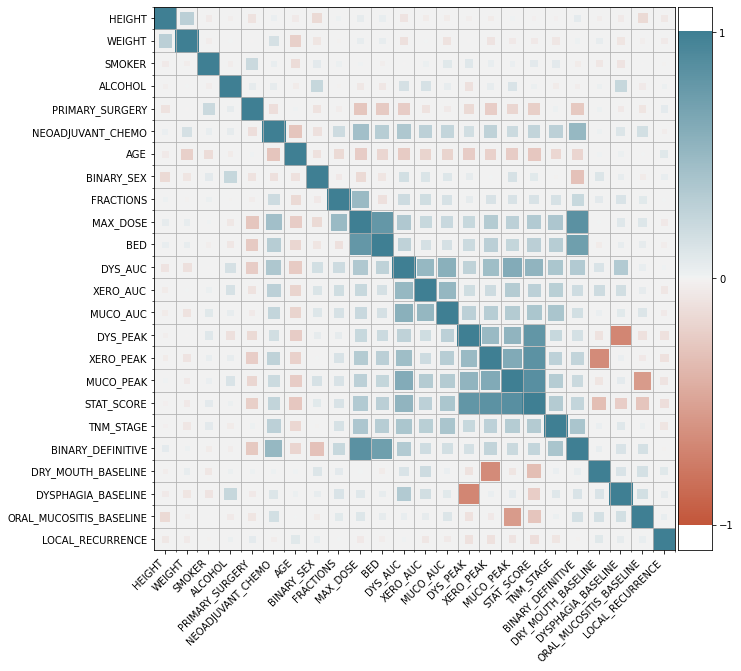

In [7]:
from heatmap import heatmap, corrplot
    
check_corr = df[['HEIGHT', 'WEIGHT', 'SMOKER',
        'ALCOHOL', 'PRIMARY_SURGERY',
       'NEOADJUVANT_CHEMO', 'AGE', 'BINARY_SEX', 'FRACTIONS', 'MAX_DOSE', 'BED',
       'DYS_AUC', 'XERO_AUC', 'MUCO_AUC', 'DYS_PEAK', 'XERO_PEAK', 'MUCO_PEAK',
       'STAT_SCORE', 'CATEGORICAL_SITE', 'TNM_STAGE', 'BINARY_DEFINITIVE',
       'DRY_MOUTH_BASELINE', 'DYSPHAGIA_BASELINE', 'ORAL_MUCOSITIS_BASELINE', 'LOCAL_RECURRENCE']]
plt.figure(figsize=(10, 10))
corrplot(check_corr.corr())

## Creating Random Forest  Model 
- Create df for the predictive variables and the class to predict as x,y
- Impute the missing information 
    - iterative imputation models each feature as a function of other features e.g. regression problem 
    - Each feature is imputed sequentially, allowing prior imputed values to be used as part of the prediction
    - 
- Use the standard scaler to normalise values between 0-1 for all categories
    - This overcomes any differences between scales, ranges or measured units by standardising to (μ = 0, σ = 1)
    - These differences can create problems for machine learning models that rely on distance calculations
    - After scaling all variables should contribute equally to the model, avoiding biasing 
- Train, Test split for RF 

In [8]:
# Import relevant ML libraries from scikitlearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

In [9]:
x = df[['HEIGHT', 'WEIGHT', 'SMOKER',
        'ALCOHOL', 'PRIMARY_SURGERY',
       'NEOADJUVANT_CHEMO', 'AGE', 'BINARY_SEX', 
        'FRACTIONS', 'MAX_DOSE', 
       'DYS_AUC', 'XERO_AUC', 'MUCO_AUC',
       'STAT_SCORE', 'CATEGORICAL_SITE', 'TNM_STAGE',
       'DRY_MOUTH_BASELINE', 'DYSPHAGIA_BASELINE', 
        'ORAL_MUCOSITIS_BASELINE']]

y = df[['LOCAL_RECURRENCE']]

In [10]:
y.value_counts()

LOCAL_RECURRENCE
0.0                 213
1.0                  16
dtype: int64

In [11]:
#Check the amount of missing data in each column 
for i in list(x.columns):
    # count number of rows with missing values
    n_miss = x[[i]].isnull().sum()
    perc = n_miss / x.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> HEIGHT, Missing: 12 (5.2%)
> WEIGHT, Missing: 18 (7.9%)
> SMOKER, Missing: 0 (0.0%)
> ALCOHOL, Missing: 0 (0.0%)
> PRIMARY_SURGERY, Missing: 0 (0.0%)
> NEOADJUVANT_CHEMO, Missing: 0 (0.0%)
> AGE, Missing: 20 (8.7%)
> BINARY_SEX, Missing: 0 (0.0%)
> FRACTIONS, Missing: 20 (8.7%)
> MAX_DOSE, Missing: 18 (7.9%)
> DYS_AUC, Missing: 0 (0.0%)
> XERO_AUC, Missing: 0 (0.0%)
> MUCO_AUC, Missing: 0 (0.0%)
> STAT_SCORE, Missing: 0 (0.0%)
> CATEGORICAL_SITE, Missing: 0 (0.0%)
> TNM_STAGE, Missing: 20 (8.7%)
> DRY_MOUTH_BASELINE, Missing: 0 (0.0%)
> DYSPHAGIA_BASELINE, Missing: 0 (0.0%)
> ORAL_MUCOSITIS_BASELINE, Missing: 0 (0.0%)


In [12]:
# Impute the data using the Iterative Imputer method
imputer = IterativeImputer(max_iter=10)
imputer.fit(x)
x_transform = imputer.transform(x)
print('Missing: %d' % sum(np.isnan(x_transform).flatten()))
imputed_x = pd.DataFrame(x_transform, columns=list(x.columns))
#imputed_x.to_csv('ImputedVoxToxData.csv')

Missing: 0


In [13]:
imputed_x

,HEIGHT,WEIGHT,SMOKER,ALCOHOL,PRIMARY_SURGERY,NEOADJUVANT_CHEMO,AGE,BINARY_SEX,FRACTIONS,MAX_DOSE,DYS_AUC,XERO_AUC,MUCO_AUC,STAT_SCORE,CATEGORICAL_SITE,TNM_STAGE,DRY_MOUTH_BASELINE,DYSPHAGIA_BASELINE,ORAL_MUCOSITIS_BASELINE
0,178.900000,82.800000,1.0,0.0,0.0,1.0,65.0,0.0,35.0,70.000000,1.50,1.29,1.36,1.111863,5.0,2.0,0.0,0.0,0.0
1,176.800000,100.500000,1.0,1.0,1.0,1.0,59.0,0.0,30.0,65.000000,1.40,0.90,1.30,-0.357612,1.0,3.0,0.0,1.0,0.0
2,169.510507,78.086980,2.0,2.0,1.0,0.0,63.0,1.0,30.0,60.000000,2.10,2.10,2.10,0.028477,6.0,3.0,0.0,3.0,0.0
3,153.000000,101.600000,1.0,0.0,1.0,1.0,44.0,0.0,30.0,62.172542,1.42,1.83,1.75,0.769021,6.0,2.0,1.0,0.0,0.0
4,151.000000,50.800000,1.0,0.0,0.0,1.0,64.0,1.0,30.0,65.000000,1.40,1.40,1.40,-0.700454,4.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,171.000000,88.000000,1.0,1.0,0.0,1.0,67.0,0.0,30.0,65.000000,1.12,1.12,0.75,0.707488,1.0,3.0,1.0,0.0,1.0
225,171.500000,129.100000,1.0,1.0,0.0,0.0,69.0,0.0,20.0,55.000000,1.00,1.17,0.67,-0.682167,4.0,2.0,1.0,0.0,0.0
226,166.400000,88.200000,1.0,0.0,0.0,0.0,75.0,0.0,30.0,65.000000,1.12,0.38,0.00,-0.339325,4.0,2.0,1.0,0.0,0.0
227,168.801869,73.827925,1.0,0.0,0.0,1.0,72.0,0.0,30.0,65.000000,0.20,1.20,1.50,0.003517,1.0,3.0,0.0,0.0,0.0


In [14]:
imputed_x
imputed_df = pd.concat([imputed_x, y], axis=1)
y=list(y['LOCAL_RECURRENCE'])

In [15]:
scaler = StandardScaler()
scaler.fit(imputed_x)
imputed_x = scaler.transform(imputed_x)

## Train and Test the Random Forest Model 

In [16]:
# Functions to determine use the train, test split for the decision tree model and its metrics 
def test_random_forest(imputed_x, y):
    predictions = {}
    error = []
    accuracy = []

    class_weights = [{0:0.05, 1:0.95}]
    x_train, x_test, y_train, y_test = train_test_split(imputed_x, y, test_size = 0.3)
    for i in range (1,16):
        for j in class_weights:
            rf_model = RandomForestClassifier(n_estimators=i, criterion='gini', \
                                             max_depth=4, class_weight=j)
            rf_model.fit(x_train, y_train)
            y_pred = rf_model.predict(x_test)
            error.append(np.mean(y_pred != y_test))
            accuracy.append(sklearn.metrics.accuracy_score(y_test, y_pred))
            print('> Accuracy:', sklearn.metrics.accuracy_score(y_test, y_pred))
            con_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred)
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
            roc_auc = auc(false_positive_rate, true_positive_rate)
            print('> AUC ROC:', roc_auc)
            print('> Confusion Matrix \n', con_matrix)
            print('Classification Report for {0} estimators and, Classweights set to {1} is: {2} \n'.format(i,j, class_report))
            predictions[i] = [y_test, y_pred]


            #return predictions, error
    return accuracy


def rf_metrics(predictions):
    accuracy = []
    brier_score = []
    precision = []
    f1_score = []
    
    
    for key in predictions.keys(): 
        con_matrix = confusion_matrix(predictions[key][0], predictions[key][1])
        class_report = classification_report(predictions[key][0], predictions[key][1])
        print(con_matrix)
        print(class_report)
        print(metrics.accuracy_score(predictions[key][0], predictions[key][1]))
        print(metrics.brier_score_loss(predictions[key][0], predictions[key][1]))
        
        accuracy.append(metrics.accuracy_score(predictions[key][0], predictions[key][1]))
        brier_score.append(metrics.brier_score_loss(predictions[key][0], predictions[key][1]))
        precision.append(metrics.precision_score(predictions[key][0], predictions[key][1]))
        f1_score.append(metrics.f1_score(predictions[key][0], predictions[key][1]))

    
    return accuracy, brier_score, precision, f1_score   

In [17]:
# Print values for the random forest model to tune hyperparameters and compare metrics 

accuracy = test_random_forest(imputed_x, y)
#accuracy, brier_score, precision, f1_score = rf_metrics(predictions)
#print(accuracy, brier_score, precision, f1_score)

> Accuracy: 0.7681159420289855
> AUC ROC: 0.42063492063492064
> Confusion Matrix 
 [[53 10]
 [ 6  0]]
Classification Report for 1 estimators and, Classweights set to {0: 0.05, 1: 0.95} is:               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        63
         1.0       0.00      0.00      0.00         6

    accuracy                           0.77        69
   macro avg       0.45      0.42      0.43        69
weighted avg       0.82      0.77      0.79        69
 

> Accuracy: 0.7971014492753623
> AUC ROC: 0.5873015873015872
> Confusion Matrix 
 [[53 10]
 [ 4  2]]
Classification Report for 2 estimators and, Classweights set to {0: 0.05, 1: 0.95} is:               precision    recall  f1-score   support

         0.0       0.93      0.84      0.88        63
         1.0       0.17      0.33      0.22         6

    accuracy                           0.80        69
   macro avg       0.55      0.59      0.55        69
weighted avg       0.8

/Users/ceilidhwelsh/opt/anaconda3/envs/voxtox/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ceilidhwelsh/opt/anaconda3/envs/voxtox/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ceilidhwelsh/opt/anaconda3/envs/voxtox/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Train, Test and Analyse the Random Forest Model with tuned hyperparameters

In [29]:
predictions = {}
error = []
accuracy = []
brier_score = []
precision = []
f1_score = []
roc_auc = []

for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(imputed_x, y, test_size = 0.3)
    rf_model = RandomForestClassifier(n_estimators=3, criterion='gini', \
                                     max_depth=4, class_weight='balanced')
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    error.append(np.mean(y_pred != y_test))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, y_pred))
    brier_score.append(sklearn.metrics.brier_score_loss(y_test, y_pred))
    precision.append(sklearn.metrics.precision_score(y_test, y_pred))
    f1_score.append(sklearn.metrics.f1_score(y_test, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    auc_value = auc(false_positive_rate, true_positive_rate)
    roc_auc.append(auc_value)
    
    print('> Accuracy:', sklearn.metrics.accuracy_score(y_test, y_pred))
    con_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    print('> AUC ROC:', roc_auc)
    print('> Confusion Matrix \n', con_matrix)
    print('Classification Report', class_report)
    predictions[i] = [y_test, y_pred]

> Accuracy: 0.8405797101449275
> AUC ROC: [0.5634615384615385]
> Confusion Matrix 
 [[57  8]
 [ 3  1]]
Classification Report               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        65
         1.0       0.11      0.25      0.15         4

    accuracy                           0.84        69
   macro avg       0.53      0.56      0.53        69
weighted avg       0.90      0.84      0.87        69

> Accuracy: 0.8405797101449275
> AUC ROC: [0.5634615384615385, 0.46031746031746035]
> Confusion Matrix 
 [[58  5]
 [ 6  0]]
Classification Report               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91        63
         1.0       0.00      0.00      0.00         6

    accuracy                           0.84        69
   macro avg       0.45      0.46      0.46        69
weighted avg       0.83      0.84      0.83        69

> Accuracy: 0.7391304347826086
> AUC ROC: [0.5634615384615385, 0.4603174603

In [30]:
print(np.mean(accuracy), np.mean(brier_score), np.mean(precision), np.mean(roc_auc))

0.8231884057971014 0.17681159420289855 0.06222222222222222 0.4785708735708735


## Random Oversampling of the Minority Class To Balance the DataSet
This dataset had a class imbalance with only 16 patients having recurrence information out of >200 patients. Oversampling the minority class and undersampling the majority class are ways to balance the dataset by adjusting how many patients don't and do have a recurrence in the data used for building the model. 

In [ ]:
x = df[['HEIGHT', 'WEIGHT', 'SMOKER',
        'ALCOHOL', 'PRIMARY_SURGERY',
       'NEOADJUVANT_CHEMO', 'AGE', 'BINARY_SEX', 
        'FRACTIONS', 'MAX_DOSE', 
       'DYS_AUC', 'XERO_AUC', 'MUCO_AUC',
       'STAT_SCORE', 'CATEGORICAL_SITE', 'TNM_STAGE',
       'DRY_MOUTH_BASELINE', 'DYSPHAGIA_BASELINE', 
        'ORAL_MUCOSITIS_BASELINE']]

y = df[['LOCAL_RECURRENCE']]

In [ ]:
# Impute the data using the Iterative Imputer method
imputer = IterativeImputer(max_iter=10)
imputer.fit(x)
x_transform = imputer.transform(x)
print('Missing: %d' % sum(np.isnan(x_transform).flatten()))
imputed_x = pd.DataFrame(x_transform, columns=list(x.columns))
#imputed_x.to_csv('ImputedVoxToxData.csv')

In [ ]:
x_df = pd.DataFrame(imputed_x)
y_df = pd.DataFrame(y)
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
resample_imputed_x, resample_y = oversample.fit_resample(imputed_x, y)

In [ ]:
resample_y.value_counts()

In [ ]:
predictions = {}
error = []
accuracy = []
roc = []
brier_score = []

for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(resample_imputed_x, resample_y, test_size = 0.3)
    rf_model = RandomForestClassifier(n_estimators=10, criterion='gini', \
                                     max_depth=4)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    #error.append(np.mean(y_pred != y_test))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, y_pred))
    brier_score.append(sklearn.metrics.brier_score_loss(y_test, y_pred))
    print('> Accuracy:', sklearn.metrics.accuracy_score(y_test, y_pred))
    print('> Brier Score:', sklearn.metrics.brier_score_loss(y_test, y_pred))
    con_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc.append(roc_auc)
    print('> AUC ROC:', roc_auc)
    print('> Confusion Matrix \n', con_matrix)
    print('Classification Report', class_report)
    predictions[i] = [y_test, y_pred]

In [ ]:
print(np.mean(accuracy), np.mean(roc), np.mean(brier_score))

In [ ]:
scaled_brier_score = 1-(np.mean(brier_score)/0.25)
print(scaled_brier_score)

## Undersampling the Majority class 

In [ ]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y_df)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
undersample_x, undersample_y = undersample.fit_resample(x_df, y_df)

In [ ]:
undersample_y.value_counts()

In [ ]:
#Check the number of instances of each class before undersampling
y_df.value_counts()

In [ ]:
# Undersample imbalanced dataset with One-Sided Undersampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
from matplotlib import pyplot
from numpy import where
# define the undersampling method and method parameters
undersample = OneSidedSelection(n_neighbors=2, n_seeds_S=40)
# transform the dataset 
oss_x, oss_y = undersample.fit_resample(x_df, y_df)

In [ ]:
#Check the number of instances of local recurrence for each class after undersampling
oss_y.value_counts()

In [ ]:
predictions = {}
error = []
accuracy = []
roc = []
brier_score = []

for i in range(1,6):
    x_train, x_test, y_train, y_test = train_test_split(oss_x, oss_y, test_size = 0.3)
    rf_model = RandomForestClassifier(n_estimators=10, criterion='gini', \
                                     max_depth=4)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    #error.append(np.mean(y_pred != y_test))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, y_pred))
    brier_score.append(sklearn.metrics.brier_score_loss(y_test, y_pred))
    print('> Accuracy:', sklearn.metrics.accuracy_score(y_test, y_pred))
    print('> Brier Score:', sklearn.metrics.brier_score_loss(y_test, y_pred))
    con_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc.append(roc_auc)
    print('> AUC ROC:', roc_auc)
    print('> Confusion Matrix \n', con_matrix)
    print('Classification Report', class_report)
    predictions[i] = [y_test, y_pred]

In [ ]:
print(np.mean(accuracy), np.mean(brier_score), np.mean(roc))